In [ ]:
# Importing modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")



Mounted at /content/gdrive


In [ ]:
class_names = ['class A', 'class B', 'class D', 'class E']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
train_path= 'gdrive/MyDrive/seg_train/train/'
print(train_path)
test_path= 'gdrive/MyDrive/seg_test/test/'

gdrive/MyDrive/seg_train/train/


In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = ['gdrive/MyDrive/seg_train/train/', 'gdrive/MyDrive/seg_test/test/']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading gdrive/MyDrive/seg_train/train/


100%|██████████| 462/462 [00:14<00:00, 32.33it/s]


Loading gdrive/MyDrive/seg_test/test/


100%|██████████| 90/90 [00:13<00:00,  6.77it/s]


In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1865
Number of testing examples: 374
Each image is of size: (150, 150)


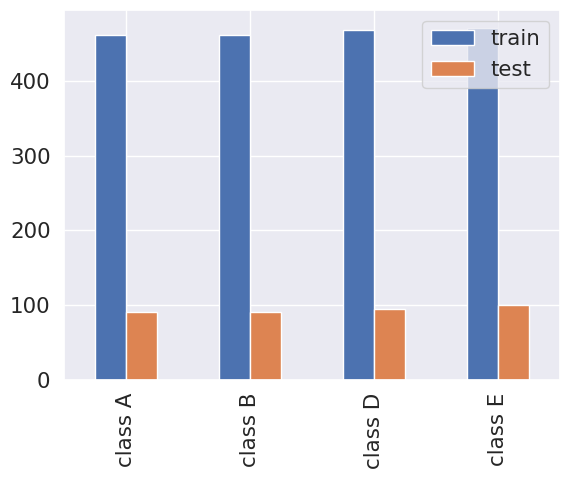

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

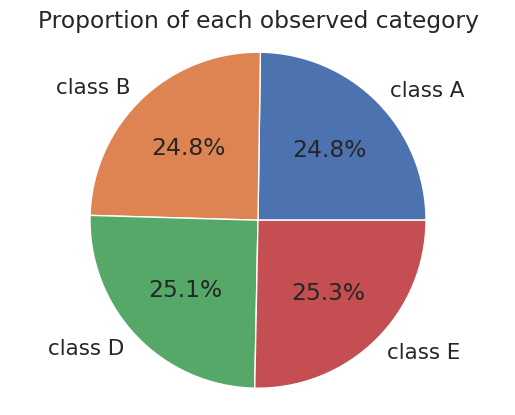

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

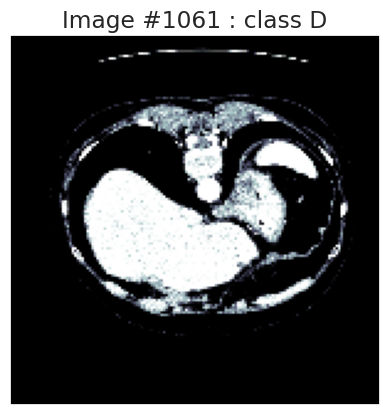

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

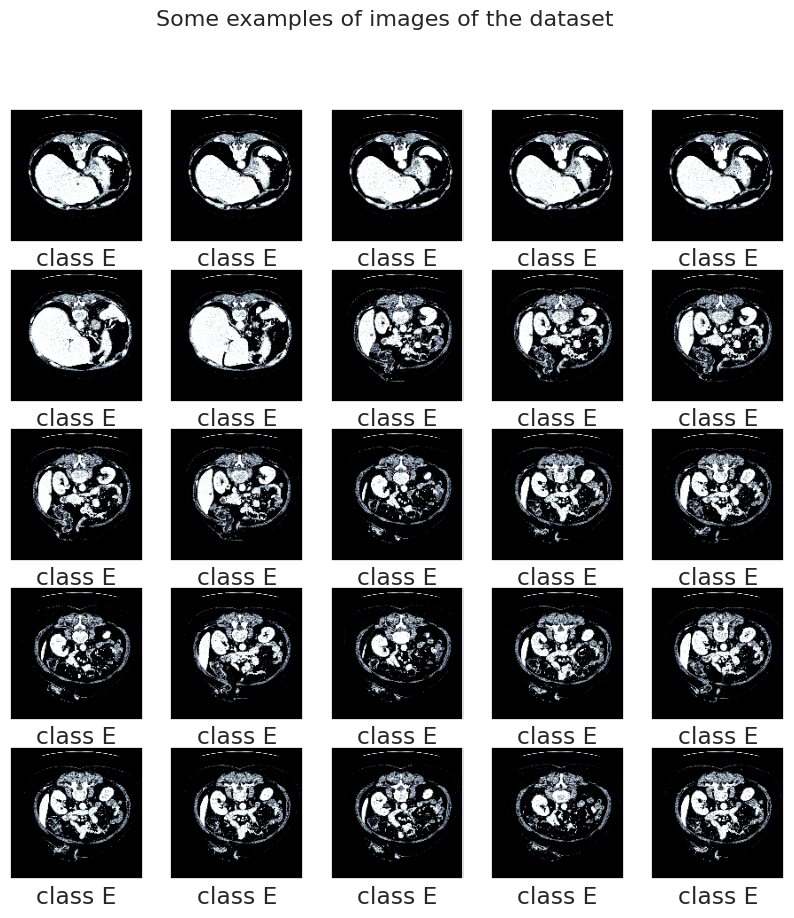

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
12/12 [==============================] - 59s 5s/step - loss: 1.2367 - accuracy: 0.5483 - val_loss: 2.1626 - val_accuracy: 0.0000e+00
Epoch 2/20
12/12 [==============================] - 61s 5s/step - loss: 0.5067 - accuracy: 0.8304 - val_loss: 1.1175 - val_accuracy: 0.7426
Epoch 3/20
12/12 [==============================] - 58s 5s/step - loss: 0.3288 - accuracy: 0.9196 - val_loss: 0.5705 - val_accuracy: 0.7319
Epoch 4/20
12/12 [==============================] - 53s 4s/step - loss: 0.2273 - accuracy: 0.9471 - val_loss: 0.8249 - val_accuracy: 0.7024
Epoch 5/20
12/12 [==============================] - 53s 4s/step - loss: 0.1949 - accuracy: 0.9551 - val_loss: 1.1298 - val_accuracy: 0.7024
Epoch 6/20
12/12 [==============================] - 62s 5s/step - loss: 0.1597 - accuracy: 0.9645 - val_loss: 0.7284 - val_accuracy: 0.7614
Epoch 7/20
12/12 [==============================] - 60s 5s/step - loss: 0.1426 - accuracy: 0.9645 - val_loss: 0.7888 - val_accuracy: 0.7802
Epoch 8/20
12/12

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
    plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

12/12 [==============================] - 8s 684ms/step - loss: 0.0771 - accuracy: 0.9920


12/12 [==============================] - 3s 255ms/step


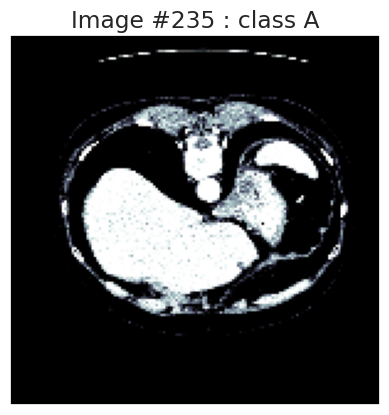

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
#print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


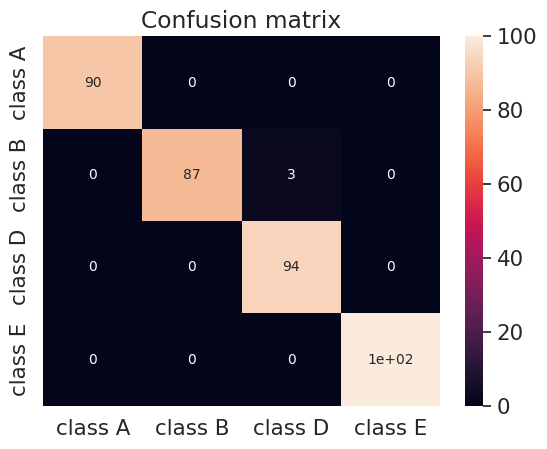

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

12/12 [==============================] - 102s 8s/step


In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

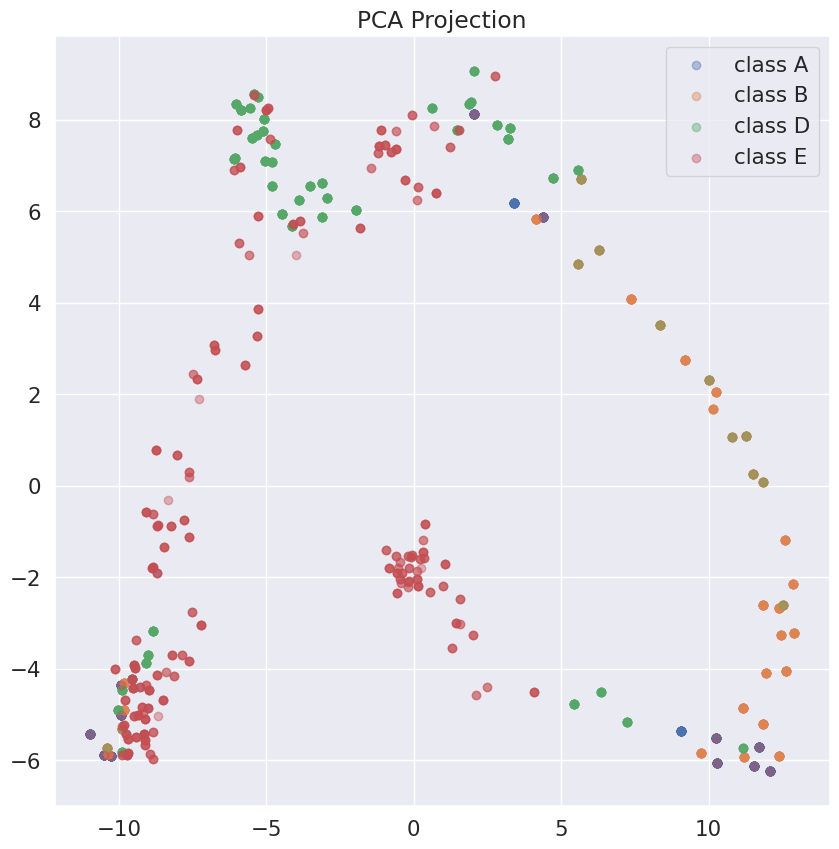

In [ ]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
12/12 [==============================] - 1s 42ms/step - loss: 1.0707 - accuracy: 0.5670 - val_loss: 1.5947 - val_accuracy: 0.4853
Epoch 2/15
12/12 [==============================] - 0s 23ms/step - loss: 0.6236 - accuracy: 0.7909 - val_loss: 1.4118 - val_accuracy: 0.6488
Epoch 3/15
12/12 [==============================] - 0s 22ms/step - loss: 0.4976 - accuracy: 0.8492 - val_loss: 1.1979 - val_accuracy: 0.6729
Epoch 4/15
12/12 [==============================] - 1s 123ms/step - loss: 0.4152 - accuracy: 0.9048 - val_loss: 0.9412 - val_accuracy: 0.7024
Epoch 5/15
12/12 [==============================] - 1s 70ms/step - loss: 0.3878 - accuracy: 0.9008 - val_loss: 1.0804 - val_accuracy: 0.6676
Epoch 6/15
12/12 [==============================] - 0s 28ms/step - loss: 0.3456 - accuracy: 0.9162 - val_loss: 1.3148 - val_accuracy: 0.6139
Epoch 7/15
12/12 [==============================] - 0s 24ms/step - loss: 0.3132 - accuracy: 0.9303 - val_loss: 0.7943 - val_accuracy: 0.7024
Epoch 8/15
1

In [ ]:
#plot_accuracy_loss(history)

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)

12/12 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9144


In [ ]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):

    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])

    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

    # Store model
    models.append(model)

In [ ]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
11/11 [==============================] - 2s 65ms/step - loss: 1.2355 - accuracy: 0.4948 - val_loss: 0.9288 - val_accuracy: 0.5600
Epoch 2/10
11/11 [==============================] - 0s 37ms/step - loss: 0.7509 - accuracy: 0.7072 - val_loss: 0.7740 - val_accuracy: 0.7133
Epoch 3/10
11/11 [==============================] - 0s 36ms/step - loss: 0.5869 - accuracy: 0.8025 - val_loss: 0.6426 - val_accuracy: 0.7667
Epoch 4/10
11/11 [==============================] - 0s 43ms/step - loss: 0.5054 - accuracy: 0.8443 - val_loss: 0.5355 - val_accuracy: 0.8333
Epoch 5/10
11/11 [==============================] - 0s 38ms/step - loss: 0.4511 - accuracy: 0.8532 - val_loss: 0.4966 - val_accuracy: 0.8333
Epoch 6/10
11/11 [==============================] - 0s 36ms/step - loss: 0.4141 - accuracy: 0.8867 - val_loss: 0.4988 - val_accuracy: 0.8600
Epoch 7/10
11/11 [==============================] - 0s 39ms/step - loss: 0.3746 - accuracy: 0.9016 - val_loss: 0.4129 - val_accuracy: 0.9200
Epoch 8/10
11

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))

predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

12/12 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.9385026737967914


In [ ]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

12/12 [==============================] - 94s 8s/step


In [ ]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_new_model = converter.convert()

In [ ]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_new_model)

In [ ]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 9, 9, 512)]       0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0   

In [ ]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
12/12 [==============================] - 142s 11s/step - loss: 1.5481 - accuracy: 0.3324 - val_loss: 2.1942 - val_accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 142s 12s/step - loss: 1.1629 - accuracy: 0.4417 - val_loss: 1.5704 - val_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 123s 10s/step - loss: 0.9033 - accuracy: 0.6092 - val_loss: 1.1461 - val_accuracy: 0.0536
Epoch 4/10
12/12 [==============================] - 123s 10s/step - loss: 0.7000 - accuracy: 0.7232 - val_loss: 1.4454 - val_accuracy: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 125s 10s/step - loss: 0.4733 - accuracy: 0.8298 - val_loss: 1.8524 - val_accuracy: 0.4638
Epoch 6/10
12/12 [==============================] - 125s 11s/step - loss: 0.3670 - accuracy: 0.8961 - val_loss: 1.3468 - val_accuracy: 0.6488
Epoch 7/10
12/12 [==============================] - 120s 10s/step - loss: 0.3453 - accuracy: 0.8834 - val_loss: 1.2773 - val_accuracy: 0

In [ ]:
#plot_accuracy_loss(history)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

12/12 [==============================] - 7s 589ms/step
Accuracy : 0.9518716577540107
